<a href="https://colab.research.google.com/github/IshaBhimani18/Python-Projects/blob/main/Exploratory_Data_Analysis_Diwali_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Promblem Statement:** The goal of this project is to analyze Diwali sales data to improve Sales.
Exploratory Data Analysis needs to be performed to derive insights from the Data.

**Objective:** Find target customers to improves Sales and Revenue.

This is a practice project done under the guidance of Rishabh Mishra (@RishabhMishraOfficial - Youtube). 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
df = pd.read_csv('Diwali Sales Data.csv', encoding = 'unicode_escape')

In [ ]:
df.shape

(11251, 15)

In [ ]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [ ]:
#Dropping black columns
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True )

In [ ]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [ ]:
#Dropping null values
df.dropna(inplace = True)

In [ ]:
df.shape

(11239, 13)

In [ ]:
df['Amount']

0        23952.0
1        23934.0
2        23924.0
3        23912.0
4        23877.0
          ...   
11246      370.0
11247      367.0
11248      213.0
11249      206.0
11250      188.0
Name: Amount, Length: 11239, dtype: float64

In [ ]:
df['Amount'] = df['Amount'].astype(int)

In [ ]:
df.dtypes

User_ID              int64
Cust_name           object
Product_ID          object
Gender              object
Age Group           object
Age                  int64
Marital_Status       int64
State               object
Zone                object
Occupation          object
Product_Category    object
Orders               int64
Amount               int64
dtype: object

In [ ]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


# Exploratory Data Analysis

##Gender


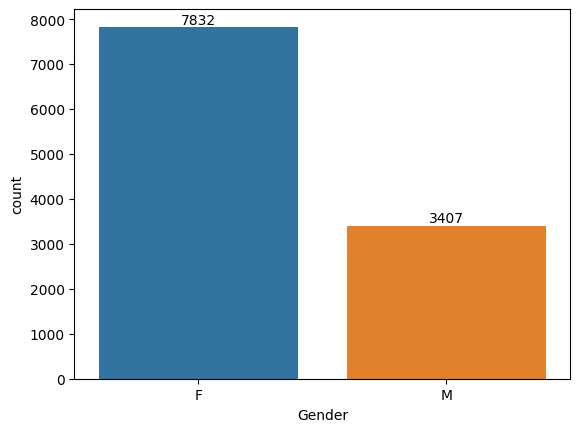

In [ ]:
#Gender vs No. of orders
ax = sns.countplot(x = df['Gender'])

for bars in ax.containers:
  ax.bar_label(bars)

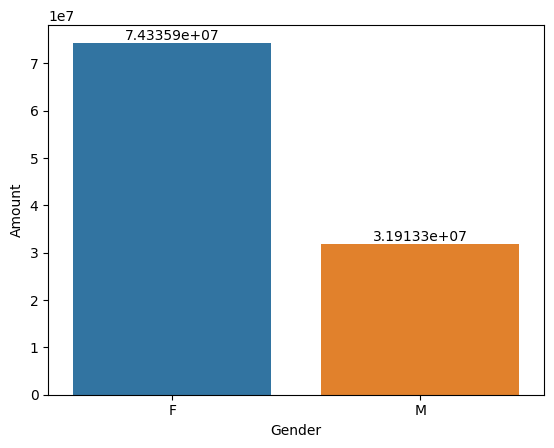

In [ ]:
#Gender vs Total Amount spent
sales_gen  = df.groupby(['Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
bx = sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)
for bars in bx.containers:
  bx.bar_label(bars)

From the above graphs, we can see that Female buyers are almost double than Male buyers and the Amount spent by Females is also almost double than that of Men.

##Age

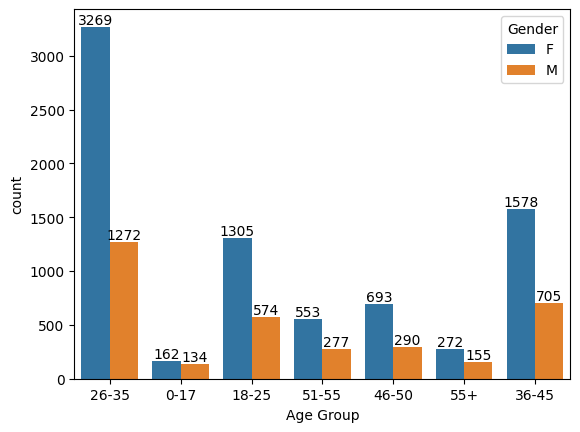

In [ ]:
#Age Group vs No. of orders
ax = sns.countplot(data = df,
x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
  ax.bar_label(bars)

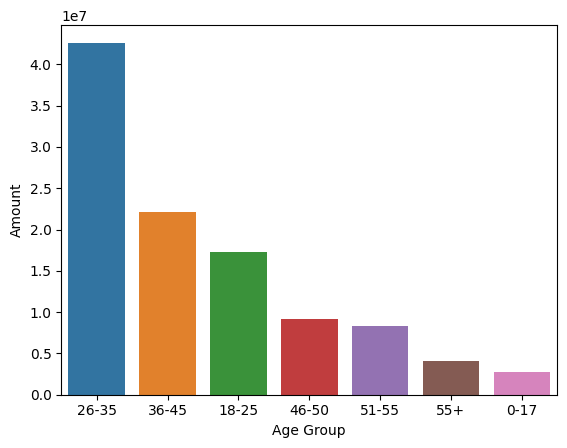

In [ ]:
#Age Group vs Total Amount spent
sales_age  = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
bx = sns.barplot(x = 'Age Group', y = 'Amount', data = sales_age)


##State


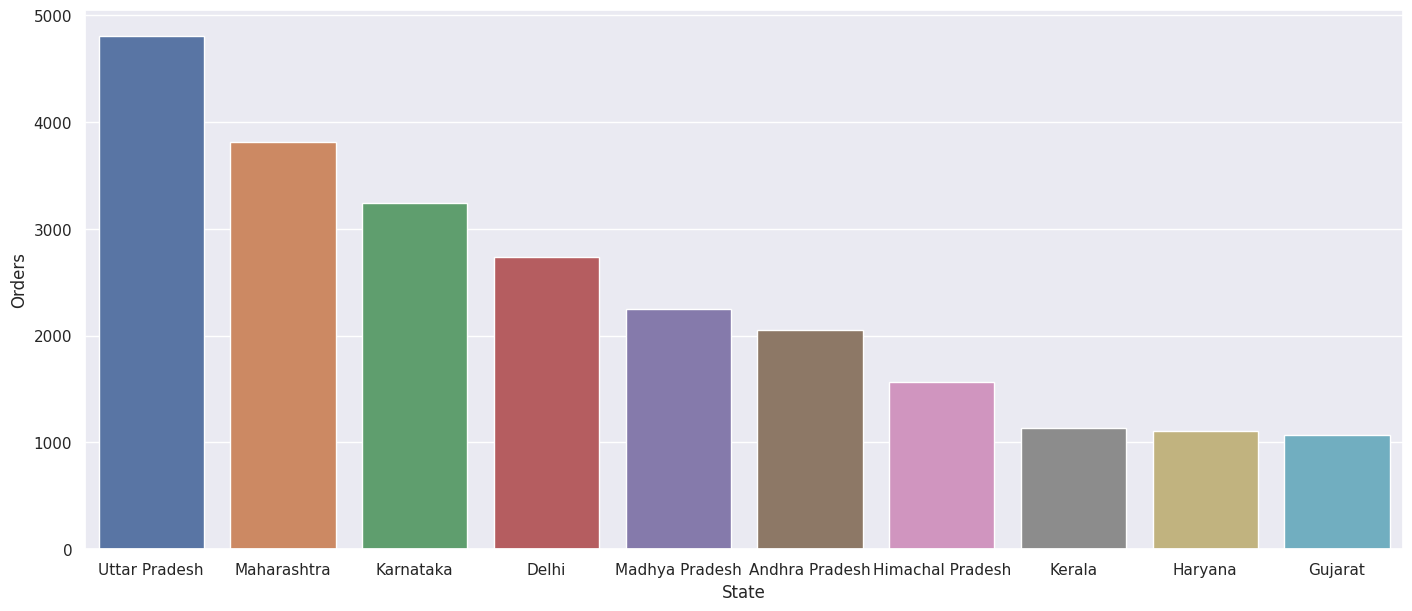

In [ ]:
#Top 10 states by No.of Orders
sales_states  = df.groupby(['State'],as_index = False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (17,7)})
bx = sns.barplot(x = 'State', y = 'Orders', data = sales_states)

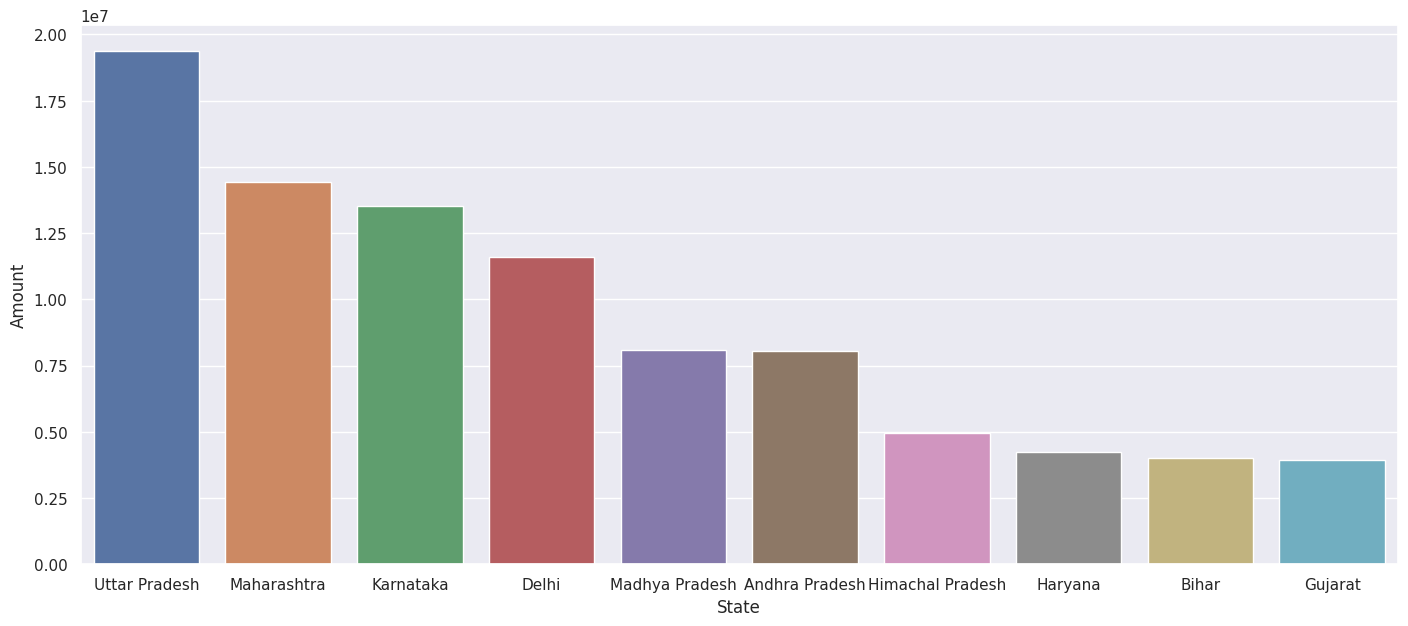

In [ ]:
#Top 10 states by Total Amount spent
sales_states  = df.groupby(['State'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (17,7)})
bx = sns.barplot(x = 'State', y = 'Amount', data = sales_states)

From the above graphs, we can see that both, the No. of Orders and the Amount are the highest in Uttar Pradesh, Maharashtra and Karnataka respectively.

#Marital Status

In [ ]:
df.replace({'Marital_Status': {0 : 'Single', 1: 'Married'}}, inplace = True)

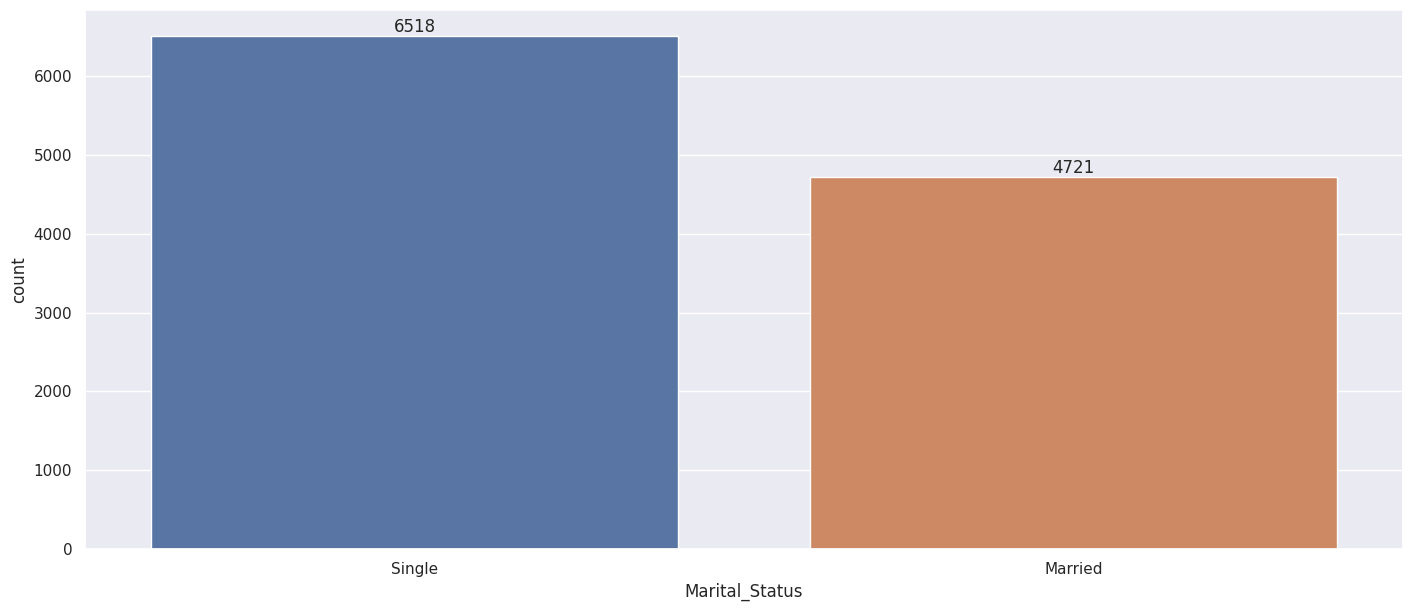

In [ ]:
#Marital_status vs No.of Orders
ax = sns.countplot(data = df, x = 'Marital_Status')
sns.set(rc = {'figure.figsize' : (4,3)})
for bars in ax.containers:
  ax.bar_label(bars)

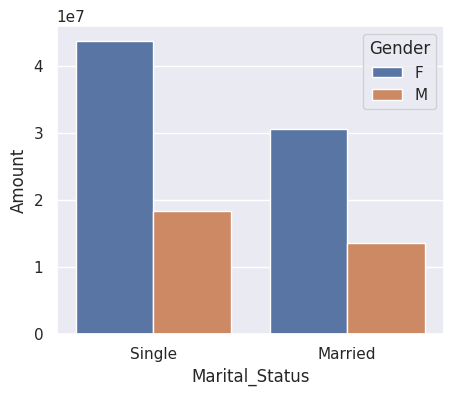

In [ ]:
#Marital_Status vs Total Amount spent
sales_marital_status  = df.groupby(['Marital_Status','Gender'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize' : (5,4)})
ax = sns.barplot(data = sales_marital_status, x = 'Marital_Status', y = 'Amount',hue = 'Gender')

From the above graphs, we can see that most no. of orders and the highest amount spent come from Single Women.

##Occupation


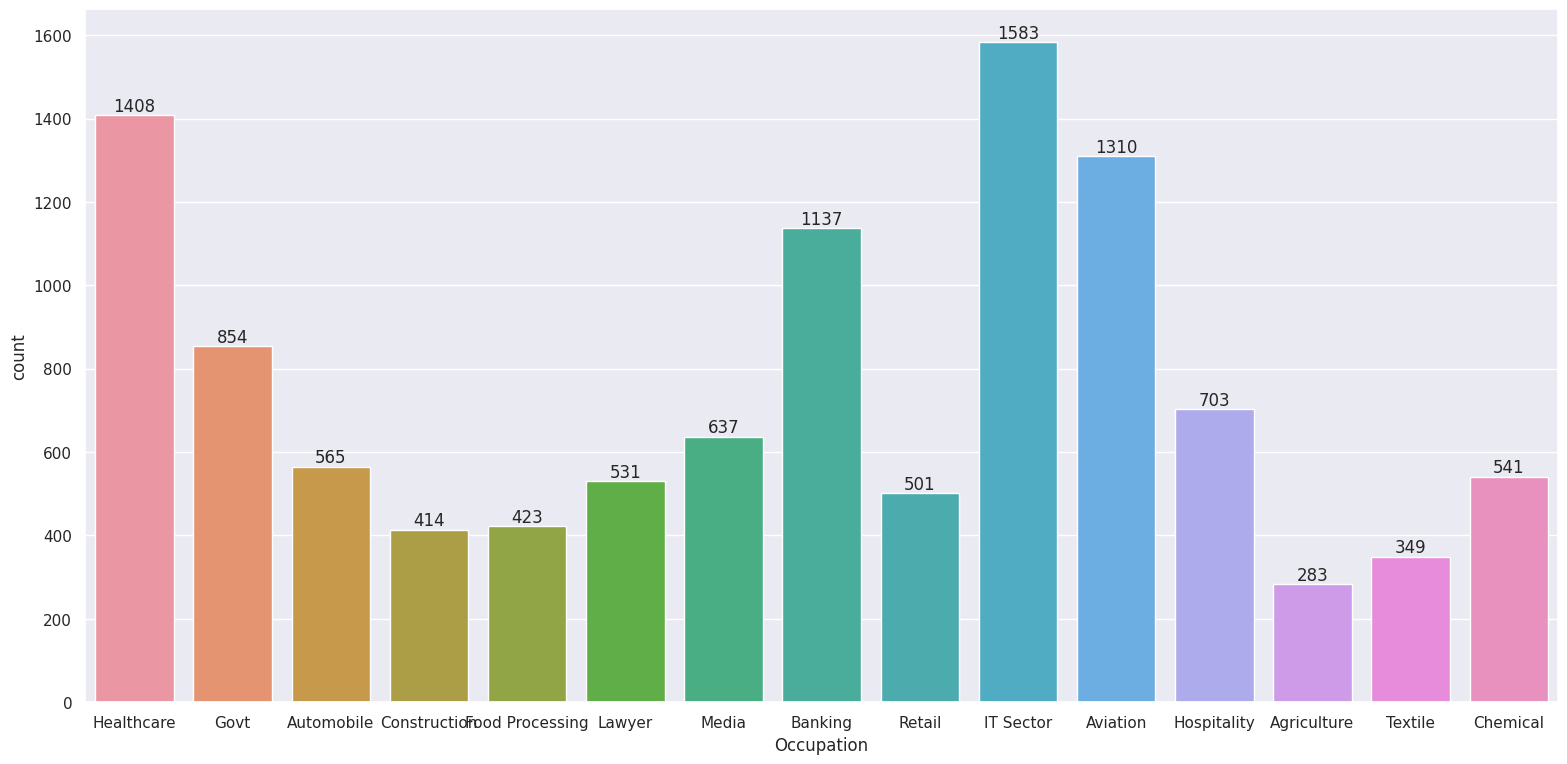

In [ ]:
#Occupation vs No.of Orders
ax = sns.countplot(data = df, x = 'Occupation')
sns.set(rc = {'figure.figsize' : (20,9)})
for bars in ax.containers:
  ax.bar_label(bars)

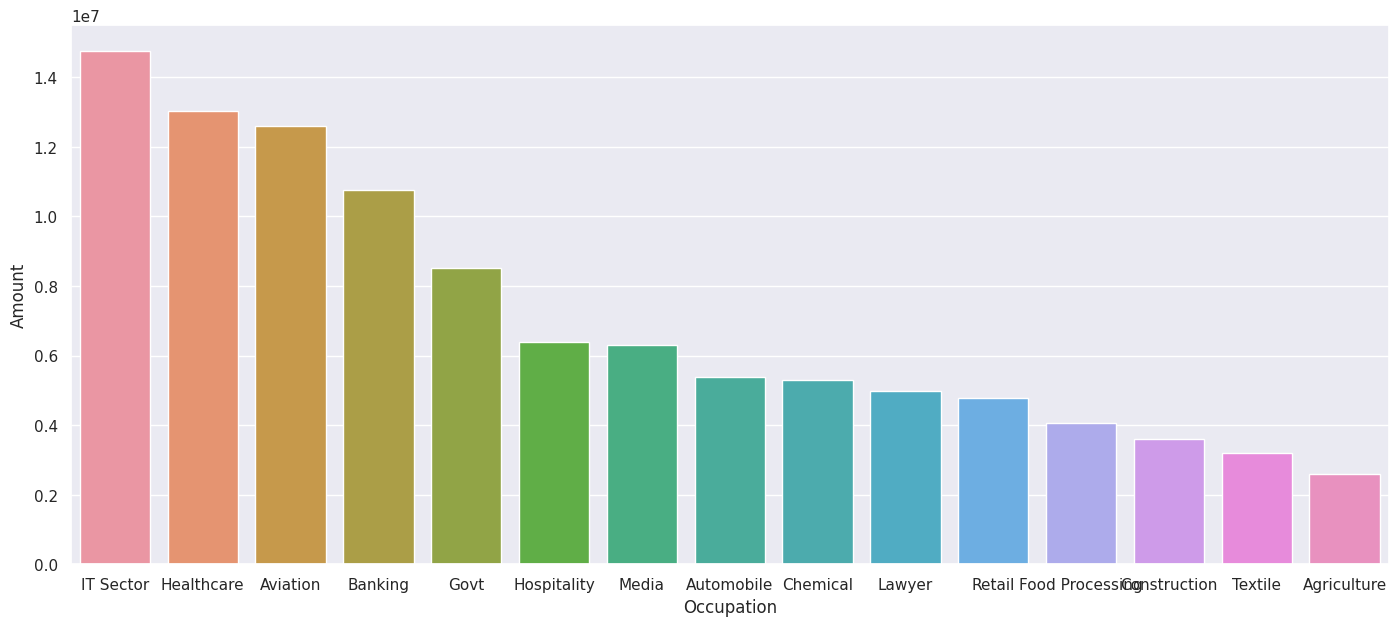

In [ ]:
#Occupation vs Total Amount spent
sales_occ  = df.groupby(['Occupation'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.set(rc = {'figure.figsize' : (17,7)})
ax = sns.barplot(x = 'Occupation', y = 'Amount', data = sales_occ)

From the above graphs we can see again, the highest No. of orders and the Total amount spent comes from customers belonging to IT Sector, Healthcare and Aviation respectively.

##Product Category

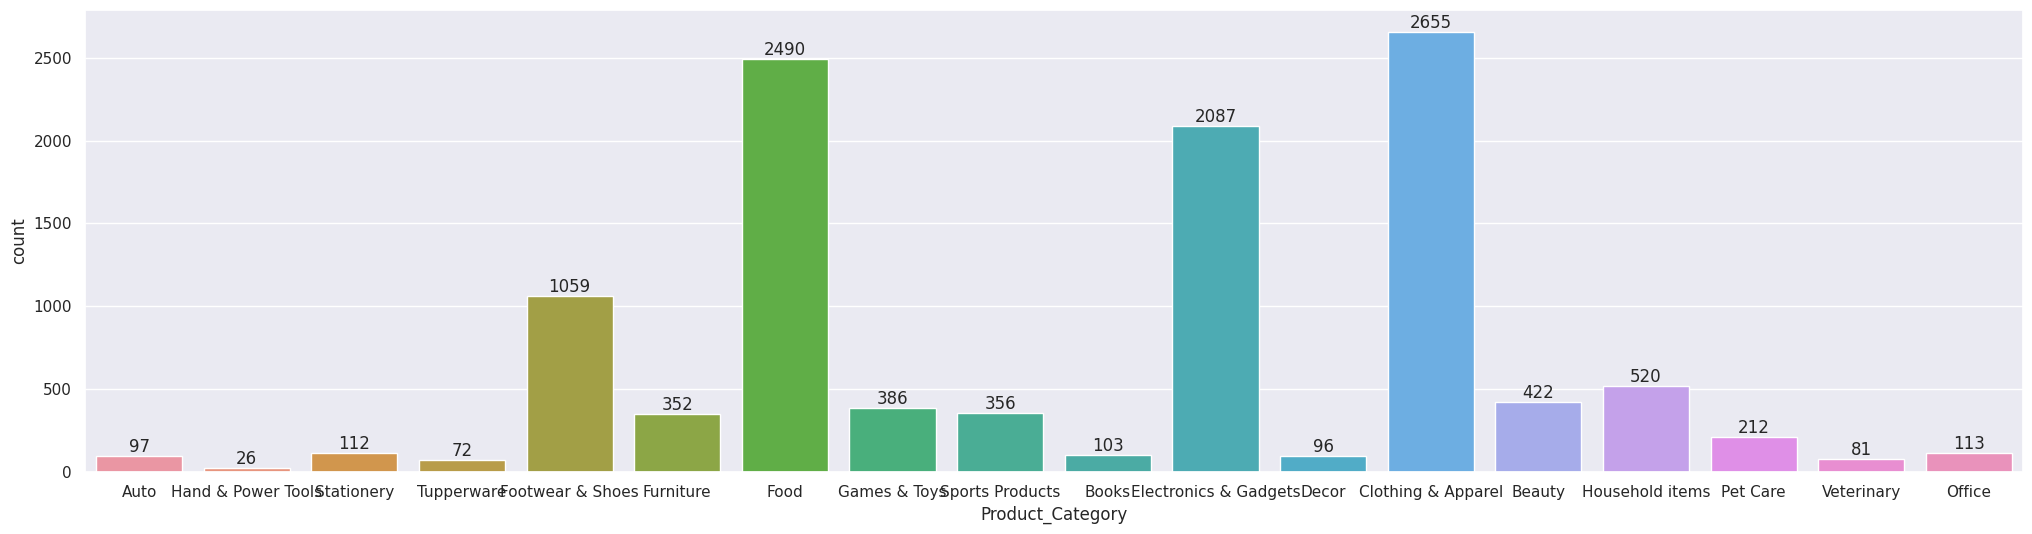

In [ ]:
#Product_Category vs No.of Orders
ax = sns.countplot(data = df, x = 'Product_Category')
sns.set(rc = {'figure.figsize' : (25,6)})
for bars in ax.containers:
  ax.bar_label(bars)

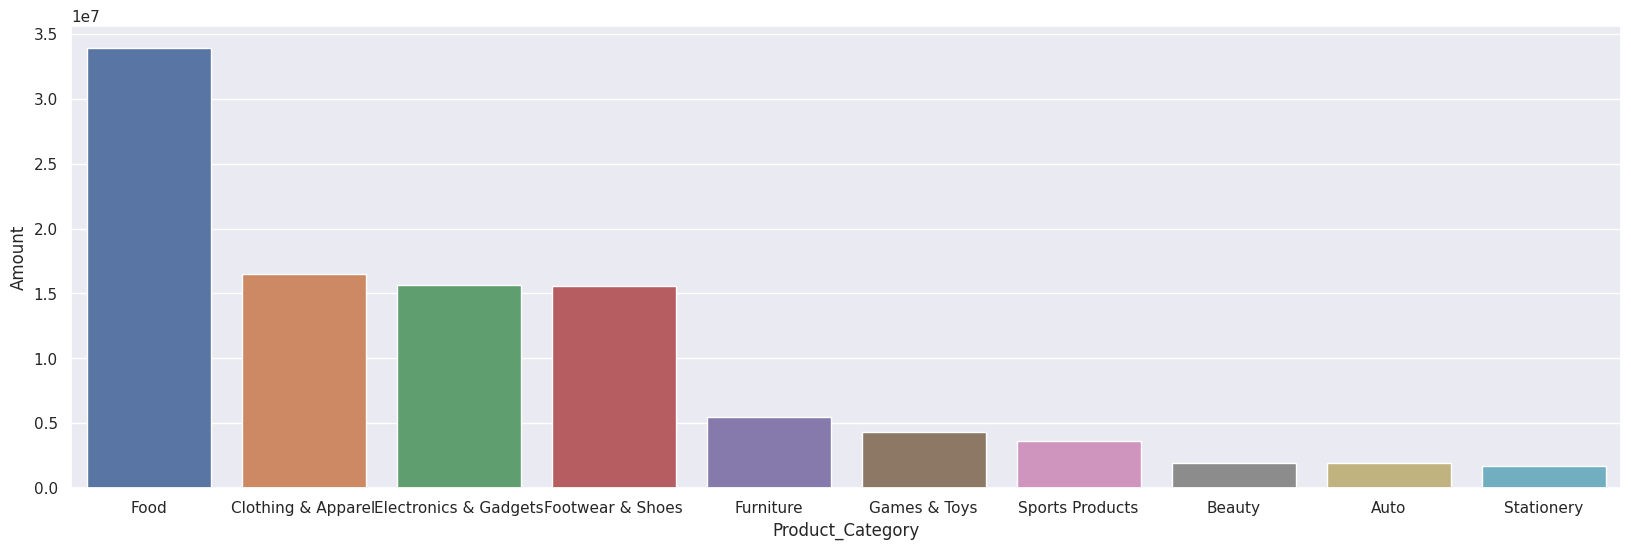

In [ ]:
#Product_Category vs Total Amount spent
sales_product  = df.groupby(['Product_Category'],as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
sns.set(rc = {'figure.figsize' : (20,6)})
ax = sns.barplot(x = 'Product_Category', y = 'Amount', data = sales_product)

From the above graphs, we can see that highest no. of orders come from Clothing & Apparel, Food and Electronics & Gadget respectively. However, the highest amount spent is on Food followed by Clothing and Electronics.

#**Summary**

**Target Customer (highest spending) belongs to:**

Gender : **Female**

Age Group : **26-35**

Marital_status : **Single**

State : **Uttar Pradesh, Maharashtra, Karnataka**

Occupation : **IT sector, Healthcare, Aviation**

Product_Category : **Food, Clothing, Electronics**